In [1]:
# Initialize Otter
import otter
grader = otter.Notebook("lab03.ipynb")

# E7: Lab Assignment 03

You must submit the lab to Gradescope by the due date. You will submit the zip file produced by running the final cell of the assignment.

## About this Lab
The objective of this assignment is to familiarize you with basic Python data structures.

## Autograder
You will be provided with some test cases (i.e., sample input data) and associated answers (i.e., expected outputs) that you can use to help check your code. The provided test cases are not exhaustive, and it is your responsibility to ensure that your code works in general, not just for a few supplied test cases. We may use additional hidden test cases in grading your lab assignments.

**Run the first cell, Initialize Otter**, to import the autograder and submission exporter.

## Answer cells
Throughout the assignment, replace `...` with your answers. We use `...` as a placeholder and theses should be deleted and replaced with your answers.

Your answers must be in the cells marked `# ANSWER CELL`, including your final calculation/code. However, do not perform scratchwork in `# ANSWER CELL`. Add a new cell to perform your scratchwork. Your scratchwork will not be graded and does not need to be included in your submission unless otherwise noted.

To read the documentation on a Python function, you can type `help()` and add the function name between parentheses.

## Score Breakdown
Question  | Points
:---      | --:
1.0 – 1.3 | 4.0
2.0 – 2.1 | 4.0
3.0 – 3.8 | 9.0
4         | 4.0
5.0 | 3.0
5.1 | 1.0
Total | 25.0

**Run the cell below**, to import the required modules.

In [2]:
# Please run this cell, and do not modify the contents
import numpy as np
import math
import matplotlib.pyplot as plt
import re
np.seterr(all='ignore');
import hashlib
def get_hash(num):
    """Helper function for assessing correctness"""
    return hashlib.md5(str(num).encode()).hexdigest()

## Introduction
For this lab assignment, you will analyze water storage of three reservoirs in California from Jan-Dec 2022. First, you will clean and manipulate the data and then, you will calculate basic statistics for each reservoir.

### Background
The three reservoirs you will analyze are Lake Oroville, Shasta Lake, and Hetch Hetchy Reservoir. Shasta Lake and Lake Oroville are the largest and second-largest reservoirs in California, providing flood-control, hydropower, and water storage for the state. Shasta Lake is a key reservoir within the federal government's Central Valley Project. Similarly, Lake Oroville is a major reservoir in the state government's California State Water Project. Hetch Hetchy reservoir is within Yosemite National Park and provides water to the City of San Francisco and other counties in the San Francisco Bay Area.

### Data
We will read a text file that includes the monthly storage volumes for each reservoir, taken from January through December 2022, in units of acre-feet. We will provide you with the command to read the file, but in the future, you will learn how to read text files and other file types. In the code cell below, we are reading a text file and saving its values as `reservoir_data`. Run the cell below and do not modify its contents.

In [3]:
# Please run this cell, and do not modify the contents
reservoir_data = np.loadtxt('resources/res_vals_int.csv',delimiter='\t')
print(reservoir_data)

[[1642000. 1621000.  294800.]
 [1655000. 1690000.  310000.]
 [1676000. 1735000.  295800.]
 [1917000. 1808000.  330700.]
 [1908000. 1815000.  360300.]
 [1721000. 1777000.  355900.]
 [1453000. 1683000.  330800.]
 [1311000. 1590000.  305100.]
 [1230000. 1515000.  281700.]
 [1102824. 1414226.  261680.]
 [ 964420. 1398822.  246236.]
 [1273042. 1523676.  254350.]]


The 12 rows correspond to the monthly storage volumes and the three columns correspond to the three reservoirs in the following order:
1. Lake Oroville
2. Shasta Lake
3. Hetch Hetchy reservoir

## Question 1.0

Create a list `reservoir_names` that includs the following two elements: `'Lake Oroville'` and `'Shasta'` (in the same order as listed here).

In [4]:
# ANSWER CELL
# BEGIN SOLUTION
reservoir_names = ['Lake Oroville','Shasta']
# END SOLUTION

In [5]:
# Do not edit this cell. This exists for grading purposes.
q1_0 = reservoir_names.copy()

In [6]:
grader.check("q1.0")

q1.0 results: All test cases passed!

## Question 1.1

In the list `reservoir_names`, Shasta Lake is listed as just `'Shasta'`. Change the value from `'Shasta'` to `'Shasta Lake'`. Do not create a new variable `reservoir_names` – use list indexing.

In [7]:
# ANSWER CELL
# BEGIN SOLUTION
reservoir_names[1] = 'Shasta Lake'
# END SOLUTION

In [8]:
# Do not edit this cell. This exists for grading purposes.
q1_1 = reservoir_names.copy()

In [9]:
grader.check("q1.1")

q1.1 results: All test cases passed!

## Question 1.2
Our list `reservoir_names` only has two entries! We are missing the third entry `'Hetch Hetchy Reservoir'`. Add `'Hetch Hetchy Reservoir'` to the end of the `reservoir_names` list. Do not redefine the list. Use appropriate list methods that allow you to add an entry to an existing list.

In [10]:
# ANSWER CELL
# BEGIN SOLUTION
reservoir_names.append('Hetch Hetchy Reservoir')
# END SOLUTION

In [11]:
# Do not edit this cell. This exists for grading purposes.
q1_2 = reservoir_names.copy()

In [12]:
grader.check("q1.2")

q1.2 results: All test cases passed!

## Question 1.3
Now that you have the correct values in `reservoir_names`, check to see if certain reservoirs are in your list. Check if `"Pardee Reservoir"` is in the list of reservoirs using list methods. Write your boolean statement and assign it to `q1_3`.

*Note:* Pardee Reservoir is a major reservoir for East Bay Municipal Utility District.

In [13]:
# ANSWER CELL
q1_3 = "Pardee Reservoir" in reservoir_names # SOLUTION

In [14]:
grader.check("q1.3")

q1.3 results: All test cases passed!

## Question 2
In this question, you will create a range of numbers 1-12 to represent the rows within the `reservoir_data` array (i.e., the months Jan - Dec).

## Question 2.0
Create range of integers from 1 to 12, inclusive, using the `range` function. Store the range of numbers as `months_range`.

In [15]:
# ANSWER CELL
# BEGIN SOLUTION
months_range = range(1,13)
# END SOLUTION

In [16]:
grader.check("q2.0")

q2.0 results: All test cases passed!

## Question 2.1
Convert `months_range` to a numpy array and to a list. Store the values as `months_nparray` and `months_list` respectively. The variables `months_nparray` and `months_list` should contain the integers 1 through 12, just like `months_range`.

In [17]:
# ANSWER CELL
months_nparray = np.array(months_range) # SOLUTION
months_list = list(months_range) # SOLUTION
print(months_nparray , months_list)

[ 1  2  3  4  5  6  7  8  9 10 11 12] [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12]


In [18]:
grader.check("q2.1")

q2.1 results: All test cases passed!

## Question 3
Now you will start to analyze the reservoir data. For this question, do not edit `reservoir_data`. Refer to the instructions at the beginning of the assignment on which column of the data corresponds to which reservoir.

## Question 3.0
First, slice the array to select the column of data corresponding to Lake Oroville.

Store the sliced data as `OrovilleData`.

In [19]:
# ANSWER CELL
# BEGIN SOLUTION
OrovilleData = reservoir_data[:,0]
# END SOLUTION

In [20]:
grader.check("q3.0")

q3.0 results: All test cases passed!

## Question 3.1
Slice the array to select the winter storage volumes for Hetch Hetchy Reservoir. For this question, use January, February, and March as the winter months.

Store the sliced data as `WinterHetchHetchy`.

In [21]:
# ANSWER CELL
# BEGIN SOLUTION
WinterHetchHetchy = reservoir_data[:3,-1]
# END SOLUTION

In [22]:
grader.check("q3.1")

q3.1 results: All test cases passed!

## Question 3.2
Slice the array to select the storage volumes for the evens months (February, April, ..., October, and December) for Lake Oroville and Hetch Hetchy Reservoir only.

Store the sliced data as `EvenMonths`.

In [23]:
# ANSWER CELL
# BEGIN SOLUTION
EvenMonths = reservoir_data[1::2, ::2] 
# END SOLUTION

In [24]:
grader.check("q3.2")

q3.2 results: All test cases passed!

## Question 3.3
For each month, how much more water was stored in Lake Oroville than in Hetch Hetchy? Report your answer in thousand acre-feet (TAF).

Store the differences in thousand acre-feet as `Diff`.

*Hint*: Your answer should be an array which includes the storage difference for each month. This can be achieved using arithmetic operations on slices of the array. Divide by 1000 to convert from acre-feet to TAF.

In [25]:
# ANSWER CELL
# BEGIN SOLUTION
Diff = (reservoir_data[:,0] - reservoir_data[:,-1])/1000
# END SOLUTION

In [26]:
grader.check("q3.3")

q3.3 results: All test cases passed!

## Question 3.4
Find the mean storage volume for Summer (July through September) for Shasta Lake. California receives very little rainfall in the summer months (July through September), so reservoir storage during these months is of particular interest.

Store the mean value as `SummerMeanStorage`.

*Hint*: Slice the data to the months and reservoir of interest, then calculate the mean of the sliced array.

In [27]:
# ANSWER CELL
# BEGIN SOLUTION
SummerMeanStorage = reservoir_data[6:9,1].mean(axis=0)
# END SOLUTION

In [28]:
grader.check("q3.4")

q3.4 results: All test cases passed!

## Question 3.5
Check if the the mean value you computed above, `SummerMeanStorage`, exists in `reservoir_data`. Write your boolean statement and assign it to `q3_5`.

In [29]:
# ANSWER CELL
q3_5 = SummerMeanStorage in reservoir_data # SOLUTION

In [30]:
grader.check("q3.5")

q3.5 results: All test cases passed!

## Question 3.6
For each month, did the storage volume in **Lake Oroville and Shasta Lake** exceed `SummerMeanStorage`?

You should answer this by creating a logical expression using the array `reservoir_data`. The output should be another array that includes `True` or `False` for each month, depending on whether each month had storages higher than `SummerMeanStorage` for both Lake Oroville and Shasta Lake. This should be stored in `q3_6`.

In [31]:
# ANSWER CELL
q3_6 = np.logical_and(reservoir_data[:,0] > SummerMeanStorage, reservoir_data[:,1] > SummerMeanStorage) # SOLUTION

In [32]:
grader.check("q3.6")

q3.6 results: All test cases passed!

## Question 3.7
For how many months did the storage volume in **Lake Oroville and Shasta Lake** exceed `SummerMeanStorage`?

Store the value as `q3_7`.

*Hint:* True is equivalent to 1 and False is equivalent to 0. So, you can take the sum of the logical array from the previous question to find the total number of months for which the logical expression is True.

In [33]:
# ANSWER CELL
# BEGIN SOLUTION
q3_7 = sum(q3_6)
# END SOLUTION

In [34]:
grader.check("q3.7")

q3.7 results: All test cases passed!

## Question 3.8
We would like to convert the data in `reservoir_data` from acre-feet to $m^3$. 1 acre-feet is equal to 1233.48 $m^3$.

Store the value as `reservoir_data_m3`.

In [35]:
# ANSWER CELL
reservoir_data_m3 = reservoir_data*1233.48 # SOLUTION

In [36]:
grader.check("q3.8")

q3.8 results: All test cases passed!

## Question 4
Write a function called `ReservoirInfo` which takes information about reservoir storage as the inputs and outputs a statement: ‘In [Month Name], [Reservoir Name] held [Volume] acre-feet of water.’ where the words in brackets are the name of the input month, reservoir name, and storage volume, respectively. The function arguments should be:

* `name`: reservoir's name as a string, exactly as it appears in `reservoir_names`
* `month`: integer representing the month number, where 1 corresponds to January, 2 corresponds to February, etc.

Be careful with your string formatting. Any small modification, such as extra space or character, will result in a failed test.

You should name the function arguments `name` and `month`. An example function call and its output are:

```
>>>ReservoirInfo(name = 'Lake Oroville', month = 1)
'In January, Lake Oroville held 1642000 acre-feet of water.'
```

Important notes:
* Your function should **return** the statement
* [Month Name] should be the full month name of the input number. You may find the [`calendar.month_name[number]`](https://docs.python.org/3/library/calendar.html#calendar.month_name) attribute helpful. To use it, you have to import the module `calendar` first.
* [Volume] should be obtained from `reservoir_data` based on the corresponding input month and reservoir name. You may find the list `index()` method helpful (returns the index of the specified element in the list). Note that [Volume] should be an **integer** and not float.

In [39]:
# ANSWER CELL
# BEGIN SOLUTION
import calendar
def ReservoirInfo(name,month):
    string = f'In {calendar.month_name[month]}, {name} held {int(reservoir_data[month-1 , reservoir_names.index(name)])} acre-feet of water.'
    return string
# END SOLUTION

'In January, Lake Oroville held 1642000 acre-feet of water.'

In [40]:
grader.check("q4")

q4 results: All test cases passed!

## Question 5.0
Finally for this assignment, you will define the input data and title string for a pre-made plotting function called `plot_storage`. The `plot_storage` function has two arguments:
* `name`: reservoir's name as a string, exactly as it appears in `reservoir_names`
* `data` is an array containing the storage data of the reservoir `name` (for only one reservoir)

Inside the function `plot_storage`, define `title_string` as a format string to have the reservoir name input, `name`, followed by "storage in 2022". For example, a graph of Lake Oroville should have the title "Lake Oroville storage in 2022". The variable `title_string` should automatically update based on the input `name`. Be careful with your string formatting. Any small modification, such as extra space or character, will result in a failed test.

Additionally, inside the function `plot_storage`, define `x_label` and `y_label` as format strings for the axes labels of your plot. Your labels should include the correct units "month" and "acre-feet". Be careful with your string formatting. Any misspelling will result in a failed test.

Once you have updated the missing statements in `plot_storage`, you will plot Hetch Hetchy data using the `plot_storage` function.
Define `name_input` as the value from the `reservoir_names` list corresponding to Hetch Hetchy. 
Define `data_input` as an array slice from `reservoir_data` corresponding to Hetch Hetchy storage data.

Finally, call the function `plot_storage` and pass the parameters `name_input` and `data_input`. Assign the function call to `q5_0`.

*Note:* This question relies on the completion of Q1.2 and Q2.0.

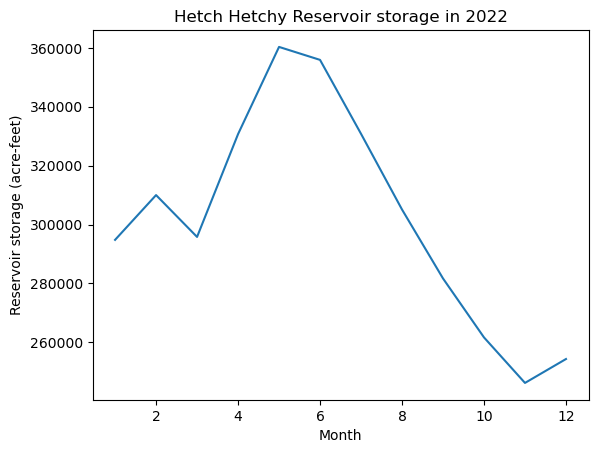

In [44]:
# ANSWER CELL
def plot_storage(name, data):
    title_string = name + ' storage in 2022' # SOLUTION
    x_label = 'Month' # SOLUTION
    y_label = 'Reservoir storage (acre-feet)'# SOLUTION
    
    # Do not edit the function code below this line.
    plt.plot(months_range, data)
    plt.xlabel(x_label)
    plt.ylabel(y_label)
    plt.title(title_string)
    plt.show()
    return title_string , x_label , y_label

name_input = reservoir_names[2] # SOLUTION
data_input = reservoir_data[:,2] # SOLUTION

# # Assign the function call to q5_0
q5_0 = plot_storage(name_input,data_input) # SOLUTION

In [ ]:
grader.check("q5.0")

## Question 5.1
In Q5.0, all three outputs from the `plot_storage` function were saved as a single variable called `q5_0`. 

Evaluate the type of `q5_0` and save the type as `q5_1a`.\
Evaluate the length of `q5_0` and save the length as `q5_1b`.

In [46]:
# ANSWER CELL
q5_1a = type(q5_0) # SOLUTION
q5_1b = len(q5_0) # SOLUTION
print(f'Type: {q5_1a} \nLength: {q5_1b}')

Type: <class 'tuple'> 
Length: 3


In [ ]:
grader.check("q5.1")

### You're done with this Lab!

**Important submission information:** After completing the assignment, click on the Save icon from the Tool Bar &nbsp;<i class="fa fa-save" style="font-size:16px;"></i>&nbsp;. After saving your notebook, **run the cell with** `grader.check_all()` and confirm that you pass the same tests as in the notebook. Then, **run the final cell** `grader.export()` and click the link to download the zip file. Then, go to Gradescope and submit the zip file to the corresponding assignment. 

**Once you have submitted, stay on the Gradescope page to confirm that you pass the same tests as in the notebook.**

Congrats on finishing lab 3!


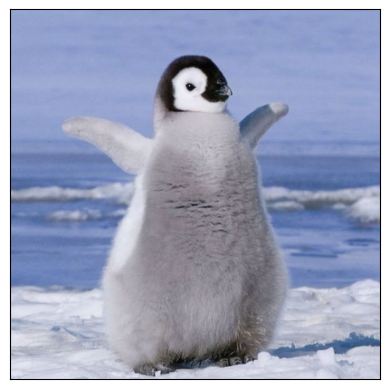

In [48]:
import matplotlib.image as mpimg
img = mpimg.imread('resources/animal.jpg')
imgplot = plt.imshow(img)
imgplot.axes.get_xaxis().set_visible(False)
imgplot.axes.get_yaxis().set_visible(False)
print("Congrats on finishing lab 3!")
plt.show()

---

To double-check your work, the cell below will rerun all of the autograder tests.

In [ ]:
grader.check_all()

## Submission

Make sure you have run all cells in your notebook in order before running the cell below, so that all images/graphs appear in the output. The cell below will generate a zip file for you to submit. **Please save before exporting!**

Make sure you submit the .zip file to Gradescope.

In [ ]:
# Save your notebook first, then run this cell to export your submission.
grader.export(pdf=False)